In [1]:
from __future__ import division
from pymongo import MongoClient
from datetime import datetime
from collections import Counter
import pandas as pd
import json


from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
client = MongoClient()
db = client.yelp

In [226]:
pipe = [{'$group': {'_id':'$business_id', 'count':{'$sum':1}}}, {'$sort': {'count':-1}}]
db.reviews.aggregate(pipe)['result']

[{u'_id': u'4bEjOyTaDG24SY5TxsaUNQ', u'count': 5558},
 {u'_id': u'lliksv-tglfUz1T3B3vgvA', u'count': 2911},
 {u'_id': u'CZjcFdvJhksq9dy58NVEzw', u'count': 2832},
 {u'_id': u'tFU2Js_nbIZOrnKfYJYBBg', u'count': 2781},
 {u'_id': u'6LM_Klmp3hOP0JmsMCKRqQ', u'count': 2551},
 {u'_id': u'eWPFXL1Bmu1ImtIa2Rqliw', u'count': 2459},
 {u'_id': u'DO3Gk17RyJVW7zYMCtYPnw', u'count': 2369},
 {u'_id': u'jf67Z1pnwElRSXllpQHiJg', u'count': 2345},
 {u'_id': u'34uJtlPnKicSaX1V8_tu1A', u'count': 2253},
 {u'_id': u'NGJDjdiDJHmN2xxU7KauuA', u'count': 2081},
 {u'_id': u'xyTJYlbE_MLouK6rCou6zg', u'count': 2004},
 {u'_id': u'-7yF42k0CcJhtPw51oaOqQ', u'count': 1970},
 {u'_id': u'FV16IeXJp2W6pnghTz2FAw', u'count': 1921},
 {u'_id': u'SsTxjxo8qvqBMvan1rzNzg', u'count': 1875},
 {u'_id': u'TWD8c5-P7w9v-2KX_GSNZQ', u'count': 1859},
 {u'_id': u'G0nUhYF2q4tnoOPwCjXLig', u'count': 1815},
 {u'_id': u'u9wjRhUjySkHPa_hG3kFOg', u'count': 1746},
 {u'_id': u'hW0Ne_HTHEAgGF1rAdmR-g', u'count': 1709},
 {u'_id': u'ripCiWZ0MblMZSLr

In [3]:
BIZ_ID = 'dyd81TK9jY-WLt6UbMFWng'
biz_summary = db.businesses.find_one({'business_id':BIZ_ID})

In [4]:
def get_all_biz_reviews(biz_id):
    review_list = []
    for review in db.reviews.find({'business_id':biz_id}).sort('date'):
        review_list.append(review)
    return review_list

In [5]:
def get_biz_users(biz_id):
    all_reviews = db.reviews.find({'business_id':biz_id})
    user_list = []
    for review in all_reviews:
        user = db.users.find_one({'user_id':review['user_id']})
        user_list.append(user)
    return user_list

In [6]:
db.businesses.find_one({'business_id':BIZ_ID}, {'_id':0})

{u'attributes': {u'Accepts Credit Cards': True,
  u'Alcohol': u'beer_and_wine',
  u'Ambience': {u'casual': False,
   u'classy': False,
   u'divey': False,
   u'hipster': False,
   u'intimate': True,
   u'romantic': False,
   u'touristy': False,
   u'trendy': False,
   u'upscale': False},
  u'Attire': u'dressy',
  u'BYOB': True,
  u'BYOB/Corkage': u'yes_free',
  u'Caters': True,
  u'Corkage': True,
  u'Delivery': False,
  u'Good For': {u'breakfast': False,
   u'brunch': False,
   u'dessert': False,
   u'dinner': True,
   u'latenight': False,
   u'lunch': False},
  u'Good For Groups': True,
  u'Good for Kids': False,
  u'Has TV': False,
  u'Noise Level': u'average',
  u'Outdoor Seating': False,
  u'Parking': {u'garage': False,
   u'lot': True,
   u'street': False,
   u'valet': False,
   u'validated': False},
  u'Price Range': 3,
  u'Take-out': False,
  u'Takes Reservations': True,
  u'Waiter Service': True,
  u'Wheelchair Accessible': True,
  u'Wi-Fi': u'free'},
 u'business_id': u'dyd81T

In [6]:
def get_averge_review(user_id):
    for stars in db.reviews.find({'user_id':user_id}):
        

IndentationError: expected an indented block (<ipython-input-6-c4d0ec7a3140>, line 3)

In [7]:
%load_ext line_profiler

In [10]:
def visualize_biz(BIZ_ID):
    # get all reviews
    reviews_list = get_all_biz_reviews(BIZ_ID)
    user_list = get_biz_users(BIZ_ID)
        
    biz = db.businesses.find_one({'business_id':BIZ_ID}, {'_id':0})
    print "Name: {}".format(biz['name'])
    print "State: {}".format(biz['state'])
    print "City: {}".format(biz['city'])
    print "Categories: {}".format(biz['categories'])
    print "Stars: {}".format(biz['stars'])
    print "Review Count: {}".format(biz['review_count'])
    print "-"*45


    # Plot the average ratting over time
    # -----------------------------------------------
    review_dates = []
    review_stars = []
    average_list = []
    for review in reviews_list:
        review_dates.append(datetime.strptime(review['date'], '%Y-%m-%d'))
        review_stars.append(review['stars'])
        average_list.append(np.mean(review_stars))

    review_dates = np.array(review_dates)
    average_list = np.array(average_list)
    sort_idx = np.argsort(review_dates)
    plt.plot(review_dates[sort_idx], average_list[sort_idx])
    plt.title('Average Rating Over Time')
    plt.xlabel('Time')
    plt.ylabel('Stars')
    plt.show()
    
    
    # Type of Users Leaving Reviews
    # -----------------------------------------------
    review_counts = []
    average_stars = []
    review_stars = []
    for review in reviews_list:
        user = db.users.find_one({'user_id':review['user_id']})
        review_counts.append(user['review_count'])
        average_stars.append(user['average_stars'])
        review_stars.append(review['stars'])
        
    better_than_average_review = [i < j for i,j in zip(average_stars, review_stars)]
    above_feature = sum(better_than_average_review) / len(better_than_average_review)
    print "Percent of Reviews Above Average for Person: {}".format(above_feature)
    
    # Reviews Distribution
    # -----------------------------------------------
    rating_groups = Counter(review_stars)
    plt.bar(rating_groups.keys(), rating_groups.values())
    plt.title('Review Distribution for %s' % biz['name'])
    plt.show()
    
    return

Name: Atlas Bistro  BYOB
State: AZ
City: Scottsdale
Categories: [u'american (new)', u'restaurants']
Stars: 4.5
Review Count: 115
---------------------------------------------


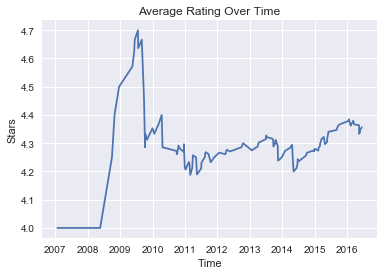

Percent of Reviews Above Average for Person: 0.730434782609


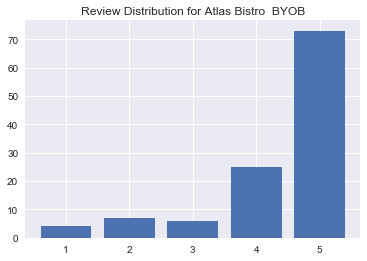

In [13]:
%lprun -f visualize_biz visualize_biz(BIZ_ID)

Name: Mon Ami Gabi
State: NV
City: Las Vegas
Categories: [u'Breakfast & Brunch', u'Steakhouses', u'French', u'Restaurants']
Stars: 4.0
Review Count: 6200
---------------------------------------------


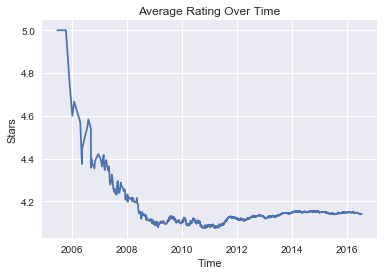

Percent of Reviews Above Average for Person: 0.678301547319


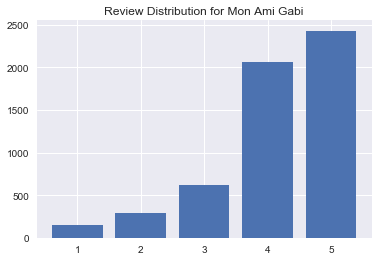

In [16]:
visualize_biz('4bEjOyTaDG24SY5TxsaUNQ')

In [34]:
checkins = db.checkins.find_one({'business_id': '-gefwOTDqW9HWGDvWBPSMQ'})['checkin_info']

In [54]:
checkin_time = np.array([datetime.strptime(x, '%H-%M') for x in checkins.keys()])
checkin_num = np.array([x for x in checkins.values()])
sort_idx = np.argsort(checkin_time)

In [ ]:
a.mi

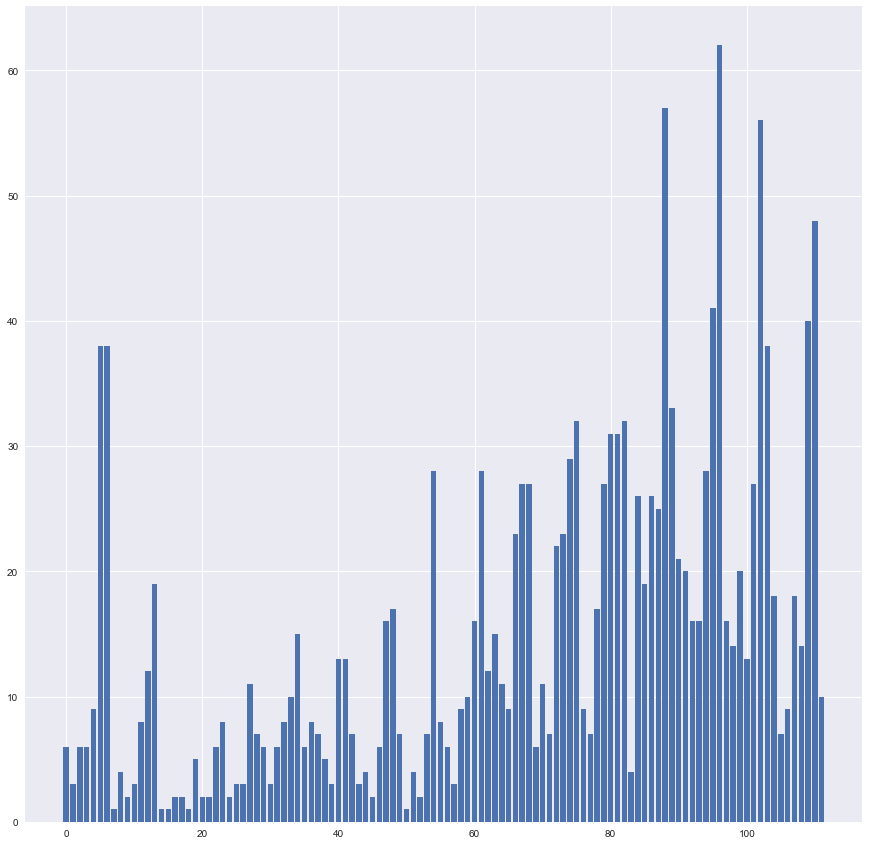

In [55]:
plt.figure(figsize=(15,15))
plt.bar(range(len(checkin_time)), checkin_num[sort_idx], align='center')

plt.show()

In [52]:
a.replace(minute=6)

datetime.datetime(1900, 1, 1, 0, 6)

# ideas

- weight each vote by number of frineds user has
- cultural trends
- seasonal trends
- clustering based on check in data
- checkin density map over time